# Algoritmo Distribución Gaussiana

## Imports

In [1]:
# importamos las librerias y bibliotecas que utilizaremos para el algoritmo de distribución gaussiana
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score

## Lectura del conjunto de datos

In [2]:
df_ini = pd.read_csv('dataset-equilibrado-3.csv')

## Visualización del conjunto de datos

In [3]:
df_ini 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1
1,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
2,72898,Female,67.0,1,1,Yes,Private,Rural,199.24,33.9,never smoked,1
3,72882,Male,47.0,0,0,Yes,Private,Rural,75.30,25.0,formerly smoked,0
4,72861,Female,52.0,0,0,Yes,Private,Urban,69.30,20.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2378,132,Female,80.0,0,0,Yes,Govt_job,Urban,84.86,NaN,Unknown,0
2379,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
2380,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
2381,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0


In [4]:
#Validamos la cantidad de ejemplos que posee el dataset
df_ini["stroke"].value_counts()

0    1600
1     783
Name: stroke, dtype: int64

## Preparación del conjunto de datos

In [5]:
#Eliminamos datos que son irrelevantes y que podrian alterar el comportamiento del algoritmo
df_ini = df_ini.drop(["id"], axis=1)

In [6]:
#Función para transformar las columnas categoricas a numericas
df= pd.get_dummies(df_ini, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [7]:
#Validamos que los cambios se aplicarón correctamente 
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,53.0,1,0,62.55,30.3,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,57.0,1,0,129.54,60.9,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,67.0,1,1,199.24,33.9,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,47.0,0,0,75.30,25.0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
4,52.0,0,0,69.30,20.1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,80.0,0,0,84.86,NaN,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2379,24.0,0,0,97.55,26.2,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2380,31.0,0,0,108.89,52.3,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2381,55.0,0,0,89.17,31.5,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

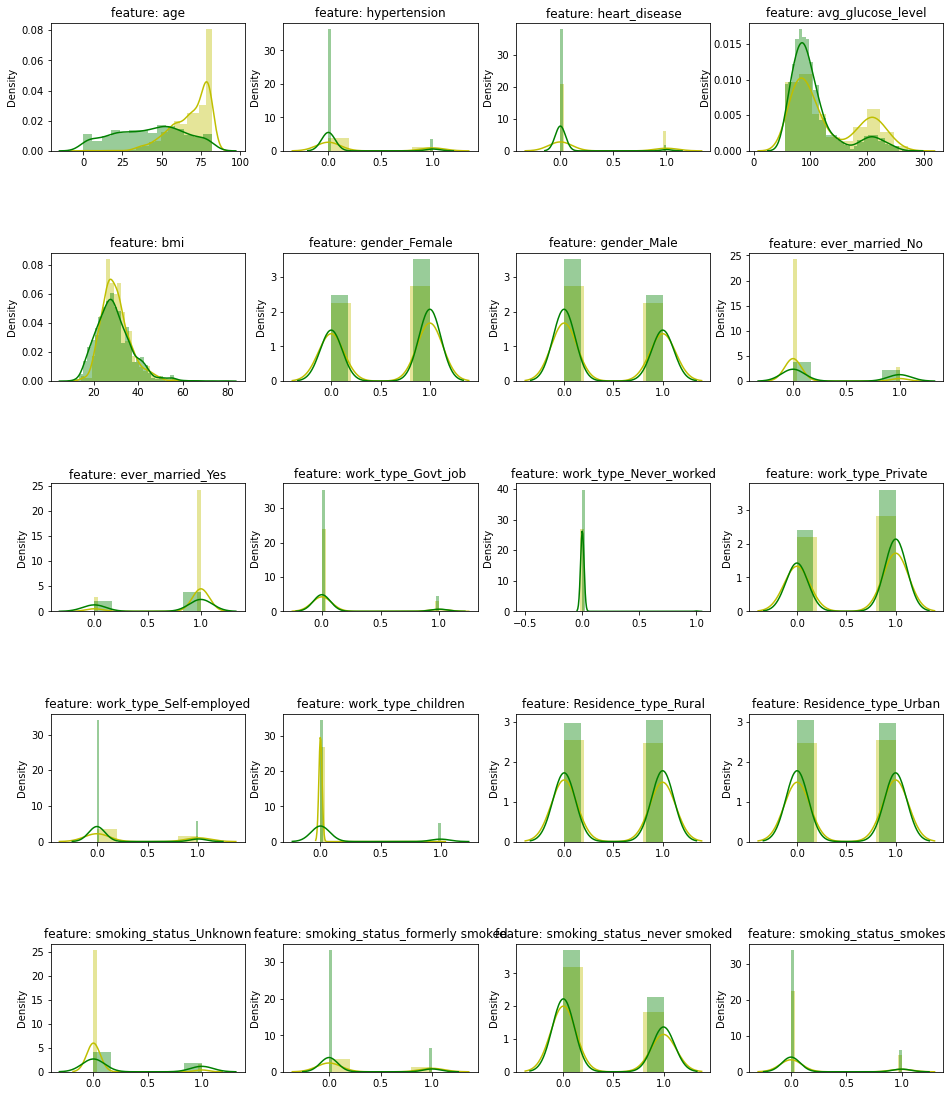

In [8]:
# Representamos gráficamente las características
features = df.drop("stroke", axis=1)

plt.figure(figsize=(16,32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[f][df["stroke"] == 1], color='y')
    sns.distplot(df[f][df["stroke"] == 0], color='g')
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

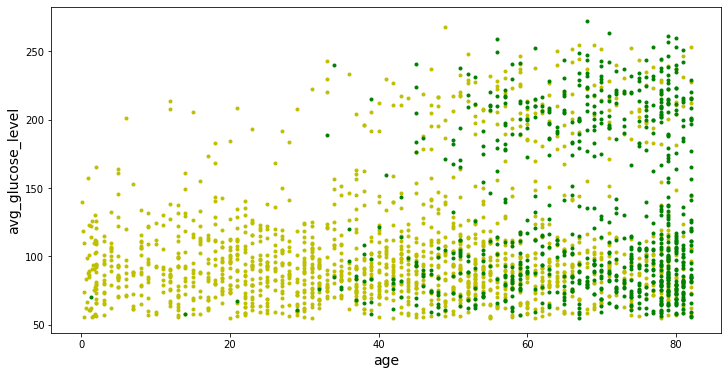

In [9]:
# Representación gráfica de dos características
plt.figure(figsize=(12, 6))
plt.scatter(df["age"][df['stroke'] == 0], df["avg_glucose_level"][df['stroke'] == 0], c="y", marker=".")
plt.scatter(df["age"][df['stroke'] == 1], df["avg_glucose_level"][df['stroke'] == 1], c="g", marker=".")
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

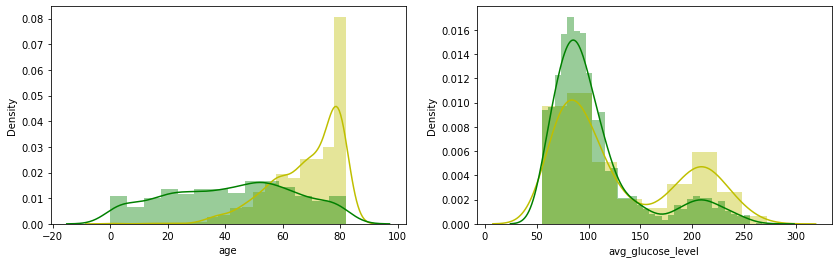

In [10]:
plt.figure(figsize=(14,4))
gs = gridspec.GridSpec(1, 2)
# Representación de la característica 1
ax = plt.subplot(gs[0])
sns.distplot(df["age"][df['stroke'] == 1], color='y')
sns.distplot(df["age"][df['stroke'] == 0], color='g')
# Representación de la cracterística 2
ax = plt.subplot(gs[1])
sns.distplot(df["avg_glucose_level"][df['stroke'] == 1], color='y')
sns.distplot(df["avg_glucose_level"][df['stroke'] == 0], color='g')
plt.show()

## Distribución Gaussiana con un conjunto de datos de dos dimensiones

In [11]:
X = df[["age", "avg_glucose_level"]].copy()
y = df["stroke"].copy()
X

,age,avg_glucose_level
0,53.0,62.55
1,57.0,129.54
2,67.0,199.24
3,47.0,75.30
4,52.0,69.30
...,...,...
2378,80.0,84.86
2379,24.0,97.55
2380,31.0,108.89
2381,55.0,89.17


In [12]:
# Construcción de un pipeline para rellenar los valores nulos con la mediana y scalar los datos 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [13]:
# Rellenamos los valores nulos
X_reduced = num_pipeline.fit_transform(X)

In [14]:
# Transformamos el resultado a un DataFrame de Pandas
X_reduced = pd.DataFrame(X_reduced, columns=X.columns, index=y.index)

In [15]:
#Validamos que los cambios se aplicaron correctamente 
X_reduced

,age,avg_glucose_level
0,-0.027778,-0.658383
1,0.083333,0.729005
2,0.361111,2.172517
3,-0.194444,-0.394325
4,-0.055556,-0.518588
...,...,...
2378,0.722222,-0.196334
2379,-0.833333,0.066480
2380,-0.638889,0.301336
2381,0.027778,-0.107073


**Entrenamiento del algoritmo con un conjunto de datos reducido**

In [16]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=42)
gm.fit(X_reduced)

GaussianMixture(n_components=2, random_state=42)

**Representación del límite de decisión**

In [17]:
def plot_gaussian_mixture(clusterer, X, y, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)

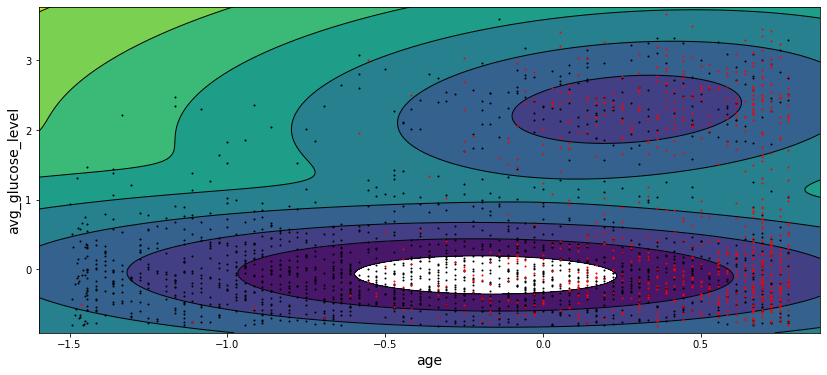

In [18]:
plt.figure(figsize=(14, 6))
plot_gaussian_mixture(gm, X_reduced.values, y)
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

**Representación de los ACV identificados**

In [19]:
# Selección del Threshold
densities = gm.score_samples(X_reduced)
density_threshold = np.percentile(densities, 0.03)
print("Threshold seleccionado:", density_threshold)

Threshold seleccionado: -9.02899652793776


In [20]:
# Identificación de ACV
anomalies = X_reduced.values[densities < density_threshold]

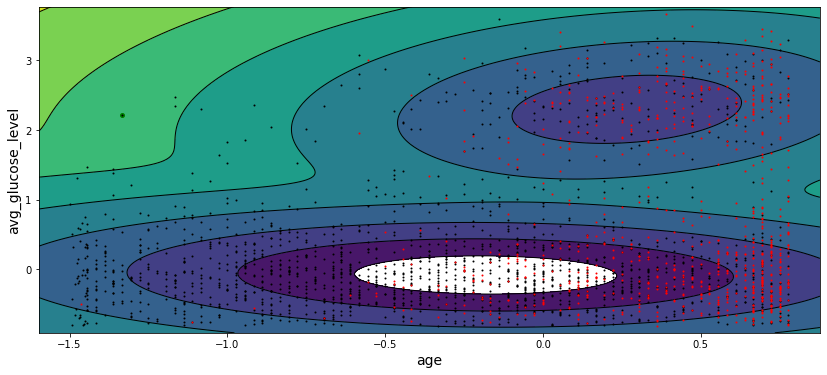

In [21]:
# Representación gráfica de los ACV
plt.figure(figsize=(14, 6))
plt.plot(anomalies[:, 0], anomalies[:, 1], 'go', markersize=4)
plot_gaussian_mixture(gm, X_reduced.values, y)
plt.xlabel("age", fontsize=14)
plt.ylabel("avg_glucose_level", fontsize=14)
plt.show()

**Predicción con el conjunto de datos reducido**

In [22]:
# Comparación de cuantas anomalías se correspondían con ejemplos fraudulentos
y_preds = (densities < density_threshold)
y_preds[y_preds == False] = 0
y_preds[y_preds == True] = 1

In [23]:
# Clases originales
y.value_counts()

0    1600
1     783
Name: stroke, dtype: int64

In [24]:
# Casos identificados como acv etiquetados como negativos (0) y positivos (1)
y[y_preds==0].value_counts()

0    1599
1     783
Name: stroke, dtype: int64

## Distribución Gaussiana con un conjunto de datos multidimensional

In [25]:
# Entrenamiento del modelo
gm = GaussianMixture(n_components=2, random_state=42)
gm.fit(X)

GaussianMixture(n_components=2, random_state=42)

In [26]:
# Selección del Threshold
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 0.1)
print("Threshold seleccionado:", density_threshold)

Threshold seleccionado: -16.054848471340566


In [27]:
# Comparación de cuantas casos se correspondían con ejemplos positivos
y_preds = (densities < -470)
y_preds[y_preds == False] = 0
y_preds[y_preds == True] = 1

In [28]:
# Casos identificados como casos etiquetados como negativos (0) y positivos (1)
y[y_preds==0].value_counts()

0    1600
1     783
Name: stroke, dtype: int64

## Búsqueda del mejor Threshold

In [29]:
from sklearn.metrics import precision_score

def select_threshold(list_thds, densities, y):
    best_prec = 0
    best_threshold = 0
    i = 0
    for thd in list_thds:
        i += 1
        print("\rSearching best threshold {0}%".format(
            int((i + 1) / len(list_thds) * 100)), end='')
        preds = (densities < thd)
        preds[preds == False] = 0
        preds[preds == True] = 1
        precision = precision_score(y, preds)
        if precision > best_prec:
            best_prec = precision
            best_threshold = thd
    return (best_prec, best_threshold)

In [30]:
select_threshold(np.arange(-600, -300, 1), densities, y)

Searching best threshold 33%

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

Searching best threshold 70%

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

Searching best threshold 100%

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

(0, 0)

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y, y_preds)))

Accuracy: 0.671


In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_preds)

array([[1600,    0],
       [ 783,    0]], dtype=int64)

In [33]:
from sklearn.metrics import f1_score

print("F1 score:", f1_score(y, y_preds, pos_label=1))

F1 score: 0.0
